# Assigment 1

Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.

In [5]:
import pandas as pd
import numpy as np
import os
from getCitiBikeCSV import getCitiBikeCSV
import matplotlib.pyplot as plt
from scipy import stats
import seaborn


%matplotlib inline

In [2]:
#download data
datestring = '201501'
getCitiBikeCSV(datestring)
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
#parse dates
df['date'] = pd.to_datetime(df['starttime'])
df.head()

('Downloading', '201501')
file in place, you can continue


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [6]:
#get age of rider
df['age'] = 2015 - df['birth year']

$H_0:$ The distribution of the ages in the citibikes dataset is normally distributed 

The KS tests p-value is: 0.000


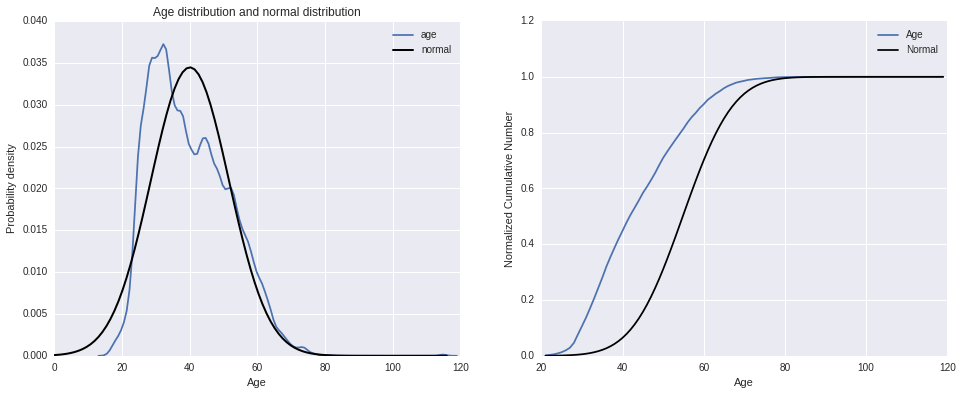

In [26]:
#normal distirbution parameters
mean = df.age.mean()
std = df.age.std()
x = np.linspace(0, df.age.max(), 99)
p = stats.norm.pdf(x, mean, std)

#plot
fig = plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)

#kernel desnity and normal distirbution plots
seaborn.kdeplot(df.age,legend=True)
plt.plot(x,p, 'k', linewidth=2,label='normal')
plt.title('Age distribution and normal distribution')
plt.xlabel('Age')
plt.ylabel('Probability density')
plt.legend()

#cumulative 
bins = np.arange(df.age.min(), df.age.max(), 1)
cumSumAge=df.age.groupby(pd.cut(df.age, bins)).agg([np.count_nonzero]).cumsum()
cumSumNormal = stats.norm.cdf(x, mean, std)

#Normalized cumulative plot
plt.subplot(1, 2, 2)
plt.plot(bins[:-1] + 5, cumSumAge / cumSumAge.max(), label = "Age")
plt.plot(bins[:-1] + 5, cumSumNormal, color = 'k',label = "Normal")
plt.ylim(0,1.2)
plt.xlabel("Age")
plt.ylabel("Normalized Cumulative Number")
plt.legend()

#ks testa
normalDistvalue = np.random.normal(loc = mean, scale = std, size = len(df.age))
ks = stats.kstest(df.age[~df.age.isnull()], 'norm')
print 'The KS tests p-value is: %.3f' %(ks[1])

## Figure 1
The figures show graphically how much the age distribution resemble the normal. Given the *KS Test* we can reject the null hypothesis that the distributions of the two samples are the same. Therefore, the distribution of the ages in the citibikes dataset is not normally distributed.

In [27]:
#Anderson test
ADtest = scipy.stats.anderson(df.age[~df.age.isnull()], dist='norm')
andersonStat =  ADtest.statistic
andersonCritic = ADtest.critical_values[ADtest.significance_level==5.][0]

if andersonStat >  andersonCritic:
    adAnswer =  'can '
else:
    adAnswer =  'can not'

print 'According the Anderson-Darling test, the null hypothesis that age of citibike riders are equally distributed ' + adAnswer + 'be rejected with 95% confidence' 

According the Anderson-Darling test, the null hypothesis that age of citibike riders are equally distributed can be rejected with 95% confidence


$H_0:$ The distribution of the ages in the citibikes dataset is distributed as the Chi Square Distribution. 

In [39]:
#Generate chi square distirbution
chisq = np.random.chisquare(mean, size = len(df.age))


The KS tests p-value is: 0.000


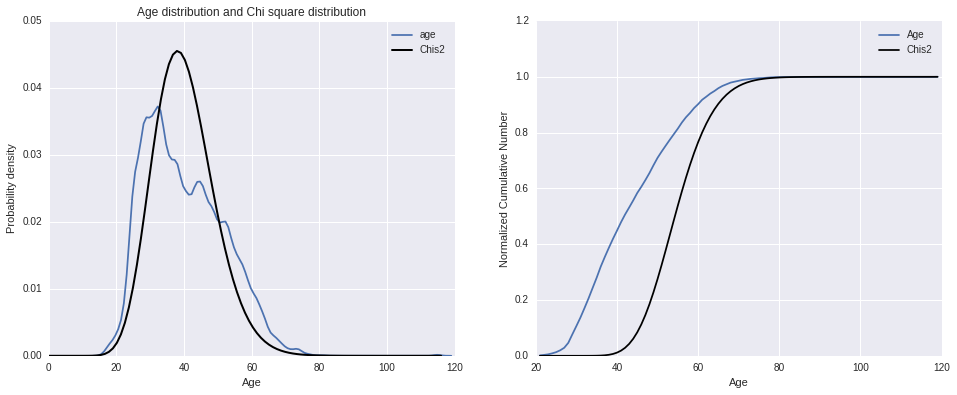

In [40]:
x = np.linspace(0, df.age.max(), 99)
pchis = scipy.stats.chi2.pdf(x, mean)

#plot
fig = plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)

#kernel desnity and chi distirbution plots
seaborn.kdeplot(df.age,legend=True)
plt.plot(x,pchis, 'k', linewidth=2,label='Chis2')
plt.title('Age distribution and Chi square distribution')
plt.xlabel('Age')
plt.ylabel('Probability density')
plt.legend()

cumSumChis = scipy.stats.chi2.cdf(x, mean)

#Normalized cumulative plot
plt.subplot(1, 2, 2)
plt.plot(bins[:-1] + 5, cumSumAge / cumSumAge.max(), label = "Age")
plt.plot(bins[:-1] + 5, cumSumChis, color = 'k',label = "Chis2")
plt.ylim(0,1.2)
plt.xlabel("Age")
plt.ylabel("Normalized Cumulative Number")
plt.legend()

#ks test
#ksChi = scipy.stats.ks_2samp(df.age, chisq)
ksChi = stats.kstest(df.age[~df.age.isnull()], 'chi2', args=(mean, df.age[~df.age.isnull()]))
print 'The KS tests p-value is: %.3f' %(ksChi[1])

## Figure 2
The figures show graphically how much the age distribution resemble the Chi Square Distribution. Given the *KS Test* we can reject the null hypothesis that the distributions of the two samples are the same. Therefore, the distribution of the ages in the citibikes dataset is not distributed as the Chi Square Distribution.

In [41]:
chisq2 = np.random.chisquare(mean, size = len(df.age[~df.age.isnull()]))
chi2Test = scipy.stats.chisquare(df.age[~df.age.isnull()], chisq2)
print 'Chi2 Test p-value = %.3f' %(chi2Test[1])

Chi2 Test p-value = 0.000


According the Chi Square test, the null hypothesis that age of citibike riders are equally distributed can be rejected with 95% confidence. 
